<a href="https://colab.research.google.com/github/estebanradesca/Proyectos-de-Machine-Learning/blob/main/PRUEBA_TEST_IA_VERTEBRAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
# Importo los paquetes necesarios

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Cargamos la base de datos de Fashion MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
# Tamaño de los datos
print(np.shape(x_train))
print(np.shape(x_test))
print(np.shape(y_train))
print(np.shape(y_test))

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


<class 'PIL.Image.Image'>
None
(28, 28)
L


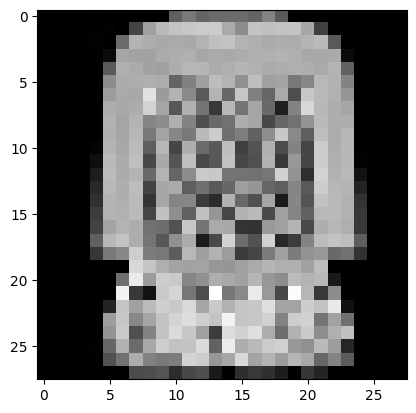

In [ ]:
# Convertimos el array en imagen

pilImage = Image.fromarray(x_train[204])
print(type(pilImage))

# Detalles de la imagen
# L significa que está en escala de grises

print(pilImage.format)
print(pilImage.size)
print(pilImage.mode)

# Graficamos la nueva imagen que es igual a la anterior

plt.imshow(pilImage, cmap='gray', vmin=0, vmax=255)
plt.show()

# Cerramos la imagen

pilImage.close()

Cargamos y transformamos los datos

In [ ]:
# 28 * 28 = 784 cantidad de píxeles
# 60000 es la cantidad de imágenes de entrenamiento
# 10000 es la cantidad de imágenes de test

cant_train = 60000
cant_test = 10000

train = np.zeros((cant_train, 784))
test = np.zeros((cant_test, 784))
label_train = np.zeros((cant_train, 1))
label_pred = np.zeros((cant_test, 1))

In [ ]:
ropa = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [ ]:
label_train = y_train

In [ ]:
# Contamos los elementos de cada clase

cantidad = np.zeros((10,))
for i in range(cant_train):
  cantidad[label_train[i]] = cantidad[label_train[i]] + 1
print(cantidad)

[6000. 6000. 6000. 6000. 6000. 6000. 6000. 6000. 6000. 6000.]


In [ ]:
# Todos tienen la misma cantidad

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [ ]:
# Cargamos los datos de train y test
# Train

for i in range(cant_train):

  # Cargamos los datos
  train[i] = x_train[i].reshape(784)

# Test

for j in range(cant_test):

  # Cargamos los datos
  test[j,:] = x_test[j].reshape(784)

In [ ]:
# Normalizamos los datos

train = train / 255
test = test / 255

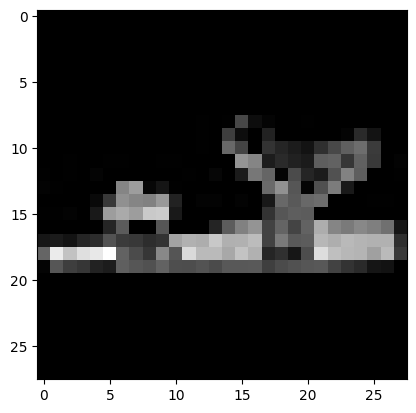

In [ ]:
# Verificamos que funcionó

imagen_nueva = (train[59999,:] * 255).reshape(28,28)
nueva = Image.fromarray(imagen_nueva)

plt.imshow(nueva, cmap='gray', vmin=0, vmax=255)
plt.show()

Diseñamos nuestra red neuronal y ajustamos hiperparámetros

In [ ]:
# El modelo va a tener la input layer de 784 nodos y la output layer de 10 nodos, en cada nodo de la última capa
# nos va a dar una probabilidad
# Las funciones de activación en las capas ocultas serán Relu (rectificación) ya que es de las más sencilla y en
# la capa de salida Softmax ya que nos va a dar probabilidades.

# La función de pérdida es sparse_categorical_crossentropy ya que queremos clasificar 10 clases cuyas etiquetas serán enteros
# y utilizamos el error de cross entropy
# El optimizador es el gradiente descendiente estocástico
# La métrica es la exactitud


loss = 'sparse_categorical_crossentropy'
optimizer = 'SGD'
metrics = ['accuracy']


# El tamaño del batch será 100
# El porcentaje para la validación será del 20 %
# EL número de epochs será 100

batch_size = 100
epochs = 100
num_classes = 10

In [ ]:
# Ahora vamos a implementar 4 modelos distintos para ajustar algunos hiperparámentros, en este caso la cantidad de capas
# y el número de nodos. Podríamos considerar otros hiperparámetros como el tamaño del batch o el número de epochs, pero
# se complejizaría bastante el análisis que tendríamos que realizar

In [ ]:
# PRIMER MODELO
# Serán 3 capas (contando la capa de entrada) y 50 nodos en la capa oculta

modelo_50 = keras.Sequential([
    keras.Input(shape=(784,)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

modelo_50.summary()

modelo_50.compile(loss=loss,
                optimizer=optimizer,
                metrics=metrics)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 50)                39250     
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
Total params: 39760 (155.31 KB)
Trainable params: 39760 (155.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/100
480/480 [==============================] - 2s 4ms/step - loss: 1.9461 - accuracy: 0.4642 - val_loss: 1.6303 - val_accuracy: 0.6186
Epoch 2/100
480/480 [==============================] - 2s 5ms/step - loss: 1.4339 - accuracy: 0.6535 - val_loss: 1.2681 - val_accuracy: 0.6758
Epoch 3/100
480/480 [==============================] - 2s 3ms/step - loss: 1.1732 - accuracy: 0.6886 - val_loss: 1.0798 - val_accuracy: 0.7075
Epoch 4/100
480/480 [==============================] - 1s 3ms/step - loss: 1.0271 - accuracy: 0.7117 - val_loss: 0.9647 - val_accuracy: 0.7248
Epoch 5/100
480/480 [==============================] - 1s 3ms/step - loss: 0.9329 - accuracy: 0.7255 - val_loss: 0.8876 - val_accuracy: 0.7333
Epoch 6/100
480/480 [==============================] - 1s 3ms/step - loss: 0.8661 - accuracy: 0.7354 - val_loss: 0.8303 - val_accuracy: 0.7444
Epoch 7/100
480/480 [==============================] - 1s 3ms/step - loss: 0.8160 - accuracy: 0.7449 - val_loss: 0.7869 - val_accuracy: 0.7523

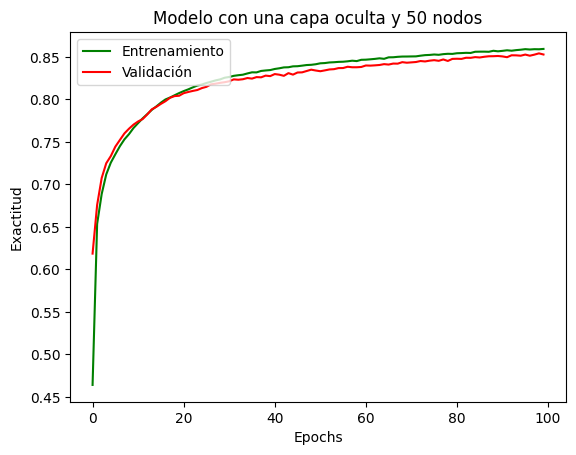

In [ ]:
fashion_train_50 = modelo_50.fit(train, label_train, batch_size=batch_size, epochs=epochs, validation_split= 0.2)

# Graficamos los datos para precisión y validación
plt.plot(fashion_train_50.history['accuracy'], 'green')
plt.plot(fashion_train_50.history['val_accuracy'], 'red')
plt.title('Modelo con una capa oculta y 50 nodos')
plt.ylabel('Exactitud')
plt.xlabel('Epochs')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

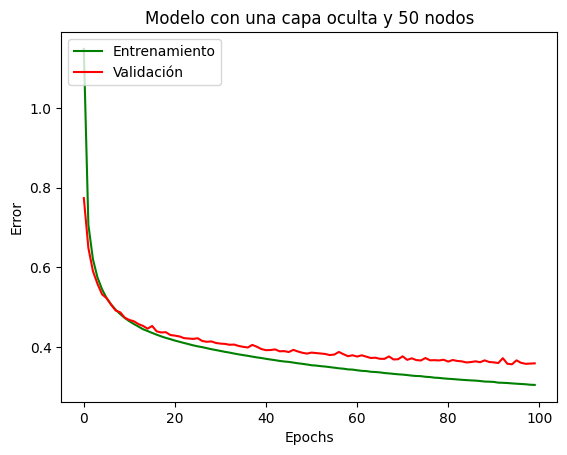

In [ ]:
# Graficamos los datos de error para entrenamiento y validación
plt.plot(fashion_train_50.history['loss'], 'green')
plt.plot(fashion_train_50.history['val_loss'], 'red')
plt.title('Modelo con una capa oculta y 50 nodos')
plt.ylabel('Error')
plt.xlabel('Epochs')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

In [ ]:
# SEGUNDO MODELO
# Serán 3 capas (contando la capa de entrada) y 100 nodos en la capa oculta

modelo_100 = keras.Sequential([
    keras.Input(shape=(784,)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

modelo_100.summary()

modelo_100.compile(loss=loss,
                optimizer=optimizer,
                metrics=metrics)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/100
480/480 [==============================] - 4s 7ms/step - loss: 1.0795 - accuracy: 0.6664 - val_loss: 0.7587 - val_accuracy: 0.7520
Epoch 2/100
480/480 [==============================] - 2s 3ms/step - loss: 0.6964 - accuracy: 0.7739 - val_loss: 0.6347 - val_accuracy: 0.7895
Epoch 3/100
480/480 [==============================] - 2s 3ms/step - loss: 0.6090 - accuracy: 0.8018 - val_loss: 0.5779 - val_accuracy: 0.8037
Epoch 4/100
480/480 [==============================] - 2s 3ms/step - loss: 0.5620 - accuracy: 0.8159 - val_loss: 0.5427 - val_accuracy: 0.8167
Epoch 5/100
480/480 [==============================] - 2s 3ms/step - loss: 0.5319 - accuracy: 0.8252 - val_loss: 0.5192 - val_accuracy: 0.8243
Epoch 6/100
480/480 [==============================] - 2s 3ms/step - loss: 0.5101 - accuracy: 0.8307 - val_loss: 0.5049 - val_accuracy: 0.8257
Epoch 7/100
480/480 [==============================] - 2s 3ms/step - loss: 0.4934 - accuracy: 0.8356 - val_loss: 0.4987 - val_accuracy: 0.8273

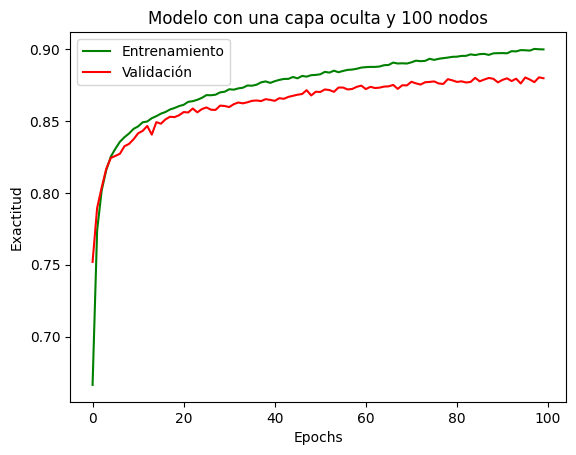

In [ ]:
fashion_train_100 = modelo_100.fit(train, label_train, batch_size=batch_size, epochs=epochs, validation_split= 0.2)

# Graficamos los datos para precisión y validación
plt.plot(fashion_train_100.history['accuracy'], 'green')
plt.plot(fashion_train_100.history['val_accuracy'], 'red')
plt.title('Modelo con una capa oculta y 100 nodos')
plt.ylabel('Exactitud')
plt.xlabel('Epochs')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

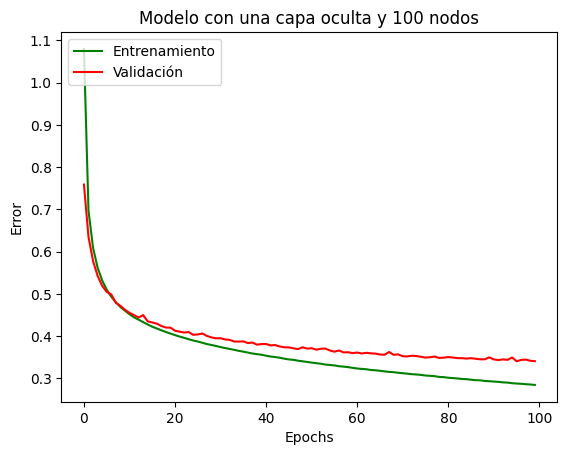

In [ ]:
# Graficamos los datos de error para entrenamiento y validación
plt.plot(fashion_train_100.history['loss'], 'green')
plt.plot(fashion_train_100.history['val_loss'], 'red')
plt.title('Modelo con una capa oculta y 100 nodos')
plt.ylabel('Error')
plt.xlabel('Epochs')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

In [ ]:
# TERCER MODELO
# Serán 4 capas (contando la capa de entrada) y 50 nodos en cada capa oculta

modelo_50_50 = keras.Sequential([
    keras.Input(shape=(784,)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

modelo_50_50.summary()

modelo_50_50.compile(loss=loss,
                optimizer=optimizer,
                metrics=metrics)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 50)                39250     
                                                                 
 dense_5 (Dense)             (None, 50)                2550      
                                                                 
 dense_6 (Dense)             (None, 10)                510       
                                                                 
Total params: 42310 (165.27 KB)
Trainable params: 42310 (165.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/100
480/480 [==============================] - 2s 4ms/step - loss: 1.2407 - accuracy: 0.5945 - val_loss: 0.7914 - val_accuracy: 0.7170
Epoch 2/100
480/480 [==============================] - 1s 3ms/step - loss: 0.7075 - accuracy: 0.7546 - val_loss: 0.6472 - val_accuracy: 0.7694
Epoch 3/100
480/480 [==============================] - 1s 3ms/step - loss: 0.6044 - accuracy: 0.7939 - val_loss: 0.5750 - val_accuracy: 0.8029
Epoch 4/100
480/480 [==============================] - 1s 3ms/step - loss: 0.5512 - accuracy: 0.8117 - val_loss: 0.5387 - val_accuracy: 0.8134
Epoch 5/100
480/480 [==============================] - 1s 3ms/step - loss: 0.5197 - accuracy: 0.8197 - val_loss: 0.5162 - val_accuracy: 0.8232
Epoch 6/100
480/480 [==============================] - 2s 4ms/step - loss: 0.4973 - accuracy: 0.8280 - val_loss: 0.4956 - val_accuracy: 0.8268
Epoch 7/100
480/480 [==============================] - 2s 4ms/step - loss: 0.4808 - accuracy: 0.8331 - val_loss: 0.4908 - val_accuracy: 0.8273

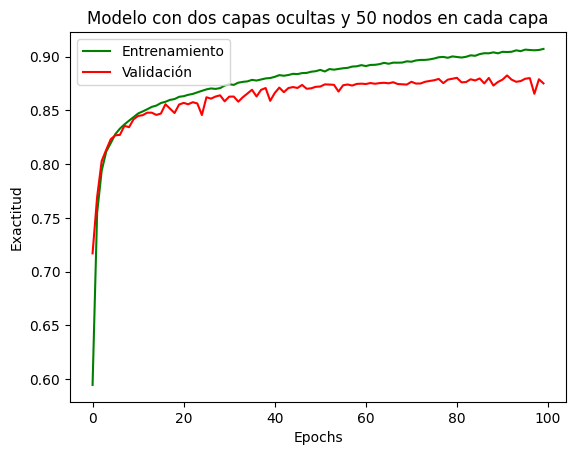

In [ ]:
fashion_train_50_50 = modelo_50_50.fit(train, label_train, batch_size=batch_size, epochs=epochs, validation_split= 0.2)

# Graficamos los datos para precisión y validación
plt.plot(fashion_train_50_50.history['accuracy'], 'green')
plt.plot(fashion_train_50_50.history['val_accuracy'], 'red')
plt.title('Modelo con dos capas ocultas y 50 nodos en cada capa')
plt.ylabel('Exactitud')
plt.xlabel('Epochs')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

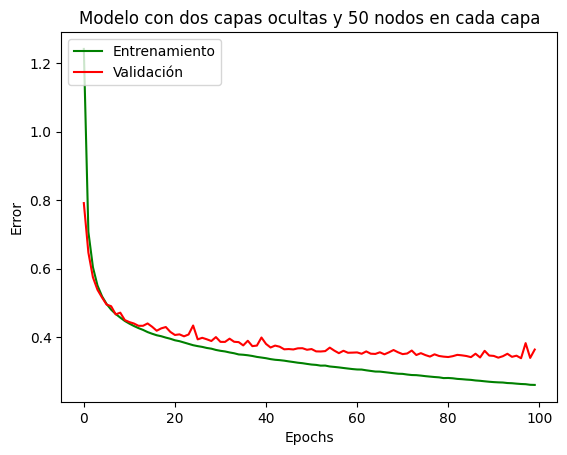

In [ ]:
# Graficamos los datos de error para entrenamiento y validación
plt.plot(fashion_train_50_50.history['loss'], 'green')
plt.plot(fashion_train_50_50.history['val_loss'], 'red')
plt.title('Modelo con dos capas ocultas y 50 nodos en cada capa')
plt.ylabel('Error')
plt.xlabel('Epochs')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

In [ ]:
# CUARTO MODELO
# Serán 4 capas (contando la capa de entrada) y 100 nodos en cada capa oculta

modelo_100_100 = keras.Sequential([
    keras.Input(shape=(784,)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

modelo_100_100.summary()

modelo_100_100.compile(loss=loss,
                optimizer=optimizer,
                metrics=metrics)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 100)               78500     
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89610 (350.04 KB)
Trainable params: 89610 (350.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/100
480/480 [==============================] - 2s 4ms/step - loss: 1.1186 - accuracy: 0.6404 - val_loss: 0.7388 - val_accuracy: 0.7519
Epoch 2/100
480/480 [==============================] - 2s 3ms/step - loss: 0.6670 - accuracy: 0.7764 - val_loss: 0.6094 - val_accuracy: 0.7973
Epoch 3/100
480/480 [==============================] - 2s 3ms/step - loss: 0.5722 - accuracy: 0.8057 - val_loss: 0.5473 - val_accuracy: 0.8144
Epoch 4/100
480/480 [==============================] - 2s 5ms/step - loss: 0.5264 - accuracy: 0.8199 - val_loss: 0.5251 - val_accuracy: 0.8163
Epoch 5/100
480/480 [==============================] - 3s 6ms/step - loss: 0.4982 - accuracy: 0.8284 - val_loss: 0.4963 - val_accuracy: 0.8259
Epoch 6/100
480/480 [==============================] - 2s 3ms/step - loss: 0.4804 - accuracy: 0.8335 - val_loss: 0.4834 - val_accuracy: 0.8312
Epoch 7/100
480/480 [==============================] - 2s 3ms/step - loss: 0.4656 - accuracy: 0.8361 - val_loss: 0.4710 - val_accuracy: 0.8349

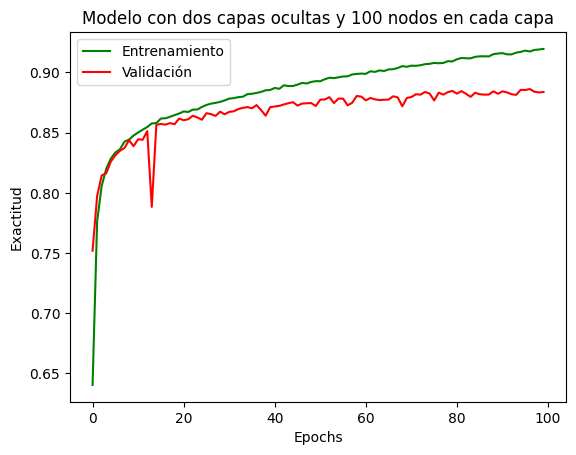

In [ ]:
fashion_train_100_100 = modelo_100_100.fit(train, label_train, batch_size=batch_size, epochs=epochs, validation_split= 0.2)

# Graficamos los datos para precisión y validación
plt.plot(fashion_train_100_100.history['accuracy'], 'green')
plt.plot(fashion_train_100_100.history['val_accuracy'], 'red')
plt.title('Modelo con dos capas ocultas y 100 nodos en cada capa')
plt.ylabel('Exactitud')
plt.xlabel('Epochs')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

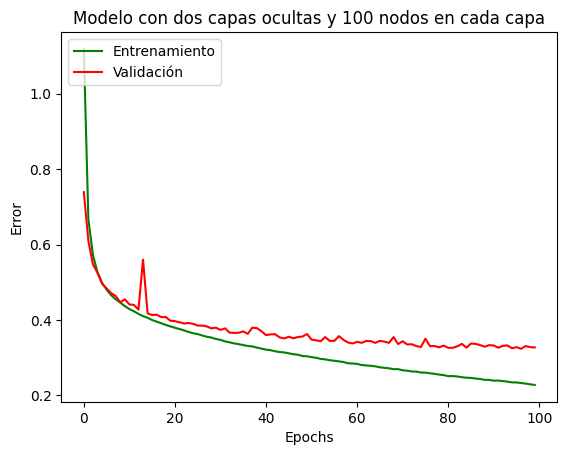

In [ ]:
# Graficamos los datos de error para entrenamiento y validación
plt.plot(fashion_train_100_100.history['loss'], 'green')
plt.plot(fashion_train_100_100.history['val_loss'], 'red')
plt.title('Modelo con dos capas ocultas y 100 nodos en cada capa')
plt.ylabel('Error')
plt.xlabel('Epochs')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

In [ ]:
# Los modelos elegidos presentan resultados relativamente similares, si consideramos los de una capa la precisión en el entrenamiento
# se encuentra alrededor de 90 % y en validación alrededor del 87 %. Cuando consideramos dos capas el tercer modelo es bastante parecido a los anteriores
# en los resultados y el último modelo presenta aparentemente una mejoría del 1 %, esto es,
# la precisión es 91 % en los datos de entrenamiento y 88 % en la validación. Por lo que seleccionaremos el modelo dos capas con
# 100 nodos en cada capa oculta
# Un aspecto a tener en cuenta es que en los 4 modelos, en la época 70, mas o menos, la precisión en validación parece estancarse y no se modifica
# significativamente a partir de ese punto. Sólo sigue mejorando la precisión y el error en los datos de entrenamiento.
# Por lo que se podría considerar un número de epochs menor a las 100 que elegimos inicialmente, como por ejemplo 80.

Selección del modelo

In [ ]:
# MODELO ELEGIDO
# Serán 4 capas (contando la capa de entrada) y 100 nodos en cada capa oculta

modelo = keras.Sequential([
    keras.Input(shape=(784,)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

modelo.summary()

modelo.compile(loss=loss,
                optimizer=optimizer,
                metrics=metrics)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 100)               78500     
                                                                 
 dense_14 (Dense)            (None, 100)               10100     
                                                                 
 dense_15 (Dense)            (None, 10)                1010      
                                                                 
Total params: 89610 (350.04 KB)
Trainable params: 89610 (350.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Consideraremos 80 epochs
fashion_train = modelo.fit(train, label_train, batch_size=batch_size, epochs=80, validation_split= 0.2)

Epoch 1/80
480/480 [==============================] - 2s 4ms/step - loss: 1.1766 - accuracy: 0.6214 - val_loss: 0.7684 - val_accuracy: 0.7507
Epoch 2/80
480/480 [==============================] - 2s 4ms/step - loss: 0.6866 - accuracy: 0.7684 - val_loss: 0.6213 - val_accuracy: 0.7949
Epoch 3/80
480/480 [==============================] - 2s 5ms/step - loss: 0.5848 - accuracy: 0.8025 - val_loss: 0.5637 - val_accuracy: 0.8070
Epoch 4/80
480/480 [==============================] - 3s 6ms/step - loss: 0.5338 - accuracy: 0.8180 - val_loss: 0.5234 - val_accuracy: 0.8178
Epoch 5/80
480/480 [==============================] - 2s 4ms/step - loss: 0.5030 - accuracy: 0.8276 - val_loss: 0.5300 - val_accuracy: 0.8102
Epoch 6/80
480/480 [==============================] - 2s 4ms/step - loss: 0.4821 - accuracy: 0.8325 - val_loss: 0.4783 - val_accuracy: 0.8321
Epoch 7/80
480/480 [==============================] - 2s 3ms/step - loss: 0.4667 - accuracy: 0.8372 - val_loss: 0.4670 - val_accuracy: 0.8366
Epoch 

Predicción del modelo en los datos de testeo

In [ ]:
label_pred = modelo.predict(test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
label_pred = np.argmax(label_pred, axis=1)
print(label_pred)

[9 2 1 ... 8 1 5]


In [ ]:
np.mean(y_test == label_pred)

0.873

In [ ]:
import csv

with open('/content/drive/MyDrive/Trabajo/sample_submission_I5njJSF.csv') as file:
    csv_reader = csv.reader(file, delimiter=',')

    for row in csv_reader:
        print(row)

Se han truncado las últimas 5000 líneas del flujo de salida.
['65000', '2']
['65001', '3']
['65002', '6']
['65003', '4']
['65004', '6']
['65005', '3']
['65006', '3']
['65007', '9']
['65008', '4']
['65009', '7']
['65010', '0']
['65011', '8']
['65012', '3']
['65013', '5']
['65014', '6']
['65015', '4']
['65016', '0']
['65017', '1']
['65018', '3']
['65019', '9']
['65020', '4']
['65021', '2']
['65022', '5']
['65023', '0']
['65024', '5']
['65025', '1']
['65026', '6']
['65027', '5']
['65028', '6']
['65029', '0']
['65030', '8']
['65031', '0']
['65032', '6']
['65033', '9']
['65034', '1']
['65035', '3']
['65036', '3']
['65037', '2']
['65038', '5']
['65039', '5']
['65040', '6']
['65041', '6']
['65042', '1']
['65043', '4']
['65044', '9']
['65045', '7']
['65046', '2']
['65047', '4']
['65048', '7']
['65049', '5']
['65050', '7']
['65051', '1']
['65052', '4']
['65053', '8']
['65054', '7']
['65055', '9']
['65056', '5']
['65057', '7']
['65058', '0']
['65059', '2']
['65060', '9']
['65061', '2']
['65062',

In [ ]:
with open('/content/drive/MyDrive/Trabajo/sample_submission_I5njJSF.csv', mode='w') as file:
    writer = csv.DictWriter(file, delimiter=',', fieldnames = [1, 2])
    writer.writerow({1:'id', 2:'label'})

    for i in range(10000):
        writer.writerow({1: 60000 + i + 1, 2: label_pred[i]})

In [ ]:
with open('/content/drive/MyDrive/Trabajo/sample_submission_I5njJSF.csv') as file:
    csv_reader = csv.reader(file, delimiter=',')

    for row in csv_reader:
        print(row)

Se han truncado las últimas 5000 líneas del flujo de salida.
['65001', '2']
['65002', '3']
['65003', '6']
['65004', '4']
['65005', '6']
['65006', '3']
['65007', '3']
['65008', '9']
['65009', '4']
['65010', '7']
['65011', '0']
['65012', '8']
['65013', '3']
['65014', '5']
['65015', '0']
['65016', '4']
['65017', '0']
['65018', '1']
['65019', '3']
['65020', '9']
['65021', '4']
['65022', '2']
['65023', '5']
['65024', '6']
['65025', '5']
['65026', '3']
['65027', '2']
['65028', '5']
['65029', '6']
['65030', '0']
['65031', '6']
['65032', '0']
['65033', '6']
['65034', '9']
['65035', '1']
['65036', '3']
['65037', '3']
['65038', '3']
['65039', '5']
['65040', '5']
['65041', '2']
['65042', '6']
['65043', '1']
['65044', '4']
['65045', '9']
['65046', '7']
['65047', '2']
['65048', '4']
['65049', '7']
['65050', '5']
['65051', '7']
['65052', '1']
['65053', '4']
['65054', '8']
['65055', '7']
['65056', '9']
['65057', '5']
['65058', '7']
['65059', '0']
['65060', '2']
['65061', '9']
['65062', '2']
['65063',